# Вычисление площадей минимального и максимального треугольника (квадрата) на множестве точек плоскости #
-------------------------------------------------------------------------------------------------

Импортируем необходимые библиотеки для проекта

In [1]:
from random import randrange
from typing import List
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

Создадим класс Point, имеющий атрибуты X и Y - это будут координаты созданной точки

In [2]:
class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y

#### Функция для генерации точек на плоскости

Функция принимает три параметра:

    * count: Количество точек на плоскости

    * Параметры of и to задают диапазон по X и Y

In [3]:
def generate_point(count: int, of: int, to: int) -> List[Point]:
    points: List[Point] = []
    for i in range(count):
        points.append(Point(randrange(of, to), randrange(of, to)))
    return points

#### Добавим немного интерактива в наш проект
Следующий код добавляет ползунки, при помощи которых можно выбрать количество точек и диапозон, отобразим их позже

In [4]:
from ipywidgets import IntSlider

slider_points = IntSlider(
    value=100, # Первоначальное значение
    min=0,     # Минимум
    max=500,  # Максимум
    step=1,  # Шаг изменения
    description='Points:',
    continuous_update=False,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)

slider_of = IntSlider(
    value=-100, # Первоначальное значение
    min=-500,     # Минимум
    max=0,  # Максимум
    step=1,  # Шаг изменения
    description='Of:',
    continuous_update=False,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)

slider_to = IntSlider(
    value=100, # Первоначальное значение
    min=0,     # Минимум
    max=500,  # Максимум
    step=1,  # Шаг изменения
    description='To:',
    continuous_update=False,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)

## Теория

### Как найти площадь треугольника (квадрата) по координатам его вершин?

**Будем выводить формулу**

Для вывода формулы площади многоугольника нам понадобятся сведения из вычислительной геометрии, а именно, понятие ориентированной площади треугольника.

Ориентированная площадь треугольника – это обычная площадь, снабженная знаком. Знак ориентированной площади треугольника АВС такой же, как у ориентированного угла между векторами AB и AC. То есть ее знак зависит от порядка перечисления вершин.

![Визуализация векторов](image/2.png)

На рис.1 треугольник АВС – прямоугольный. Его ориентированная площадь равна ![Визуализация векторов](image/3.gif)
(она больше нуля, так как пара OB, OC. Площадь многоугольника ориентирована положительно).  Эту же величину можно вычислить другим способом.

Пусть О – произвольная точка плоскости. На рисунке площадь треугольника ABC получится, если из площади треугольника OBC вычесть площади OAB и OCA. Таким образом, нужно просто сложить ориентированные площади треугольников OAB, OBC и OCA. Это правило работает при любом выборе точки О.

Точно так же для вычисления площади любого многоугольника ![Точки](image/4.gif)
нужно сложить ориентированные площади треугольников ![Точки](image/5.gif)
![Точки](image/3.png)

В сумме получится площадь многоугольника, взятая со знаком плюс, если при обходе ломаной ![Точки](image/4.gif)
многоугольника находится слева (обход границы против часовой стрелки), и со знаком минус, если он находится справа (обход по часовой стрелке).

Итак, вычисление площади многоугольника свелось к нахождению площади треугольника. Посмотрим, как выразить ее в координатах.

Векторное произведение двух векторов на плоскости есть площадь параллелограмма, построенного на этих векторах.

![Точки](image/4.png)

Векторное произведение, выраженное через координаты векторов:

![Точки](image/6.gif)

Площадь треугольника будет равна половине этой площади:

![Точки](image/7.gif)

В качестве точки О удобно взять начало координат, тогда координаты векторов, на основании которых вычисляются ориентированные площади, совпадут с координатами точек.

Пусть (х1, y1), (x2, у2), …, (хN,уN) —координаты вершин заданного многоугольника в порядке обхода по или против часовой стрелки. Тогда его ориентированная площадь S будет равна:

![Точки](image/5.png)

Это и есть наша рабочая формула, она используется в нашей программе

---

## Итак, начнём с треугольника
------------------------

#### Функция для нахождения площади

В параметрах указываются векторы, содеражащие свои координаты

Для нахождения площади воспользуемся найденной формулой.

In [5]:
def area_triangle(vector_a: tuple[float, float], vector_b: tuple[float, float]):
    return abs(vector_a[0] * vector_b[1] - vector_a[1] * vector_b[0]) / 2

#### Функция для нахождения координат вектора

Для нахождения координат вектора, необходимо из координат конца вектора вычесть начальные координаты

Функция принимает два параметра:

    * point_start: Начало вектора

    * point_end: Конец вектора

In [6]:
def vector_coordinates(point_start: Point, point_end: Point):
    return point_end.x - point_start.x, point_end.y - point_start.y

#### Основная функция для нахождения максимальной и минимальной площади треугольника, которая также вернёт координаты найденных треугольников с максимальной и минимальной площадью



In [7]:
def triangle(points: List[Point]) -> tuple[int, tuple[int, int, int], int, tuple[int, int, int]]:
    eps = 1e-10
    min_area = 0
    max_area = 0
    index_points_min_area = ()
    index_points_max_area = ()

    for a in range(len(points)):
        for b in range(a, len(points)):
            vector_a = vector_coordinates(points[a], points[b])
            for c in range(b, len(points)):
                vector_b = vector_coordinates(points[b], points[c])
                area = area_triangle(vector_a, vector_b)

                if area > max_area:
                    max_area = area
                    index_points_max_area = (a, b, c)

                if area > eps and (min_area - area > eps or min_area < eps):
                    min_area = area
                    index_points_min_area = (a, b, c)

    return min_area, index_points_min_area, max_area, index_points_max_area

### Демонстрация работы алгоритма

При помощи функции display() из библиотеке IPython отобразим ползунки, которые зададут количество точек и диапазон

In [8]:
display(slider_points)
display(slider_of)
display(slider_to)

IntSlider(value=100, continuous_update=False, description='Points:', max=500)

IntSlider(value=-100, continuous_update=False, description='Of:', max=0, min=-500)

IntSlider(value=100, continuous_update=False, description='To:', max=500)

Создадим точки на плоскости, при помощи функции для генерации точек, в параметры которой передадим значения ползунков

In [9]:
points = generate_point(count=slider_points.value, of=slider_of.value, to=slider_to.value)

Воспользуемся функцией для нахождения площади треугольника

In [10]:
min_area, index_points_min_area, max_area, index_points_max_area = triangle(points)

#### Площадь наименьшего треугольника равна и его координаты:

In [11]:
min_area

0.5

In [12]:
print(f"{points[index_points_min_area[0]].x, points[index_points_min_area[0]].y}\n"
      f"{points[index_points_min_area[1]].x, points[index_points_min_area[1]].y}\n"
      f"{points[index_points_min_area[2]].x, points[index_points_min_area[2]].y}")

(-44, 64)
(45, -65)
(25, -36)


#### Площадь наибольшего треугольника равна и его координаты:

In [13]:
max_area

18014.0

In [14]:
print(f"{points[index_points_max_area[0]].x, points[index_points_max_area[0]].y}\n"
      f"{points[index_points_max_area[1]].x, points[index_points_max_area[1]].y}\n"
      f"{points[index_points_max_area[2]].x, points[index_points_max_area[2]].y}")

(98, -88)
(-92, -91)
(-68, 99)


#### Запишем координаты по X и Y в отдельные переменные, чтобы вывести графики

In [15]:
coords_x_min = [points[index_points_min_area[i]].x for i in range(3)]
coords_y_min = [points[index_points_min_area[i]].y for i in range(3)]
coords_x_min.append(points[index_points_min_area[0]].x)
coords_y_min.append(points[index_points_min_area[0]].y)

coords_x_max = [points[index_points_max_area[i]].x for i in range(3)]
coords_y_max = [points[index_points_max_area[i]].y for i in range(3)]
coords_x_max.append(points[index_points_max_area[0]].x)
coords_y_max.append(points[index_points_max_area[0]].y)

#### Выведем графики с использованием записанных ранее координат

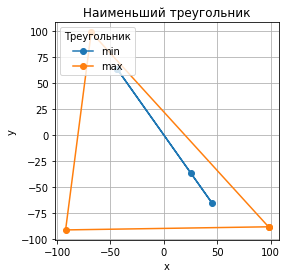

In [16]:
# Построение графика
plt.figure(figsize=(4,4))
plt.title("Наименьший треугольник") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(coords_x_min, coords_y_min, coords_x_max, coords_y_max, marker="o")  # построение графика
plt.legend(['min', 'max'], loc=2, title='Треугольник') # Добавление легенды

## С треугольником разобрались, теперь приступим к квадрату
----------------------------------

#### Функция для вычисление векторного произведения

In [17]:
def composition_vector(point_a: Point, point_b: Point):
    return point_a.x * point_b.y - point_a.y * point_b.x

#### Функция для вычисления площади квадрата

In [18]:
def area_square(point_a: Point, point_b: Point, point_c: Point, point_d: Point):
    return sum((composition_vector(point_a, point_b),
                composition_vector(point_b, point_c),
                composition_vector(point_c, point_d),
                composition_vector(point_d, point_a))) / 2

#### Основная функция для нахождения максимальной и минимальной площадей квадратов, которая также вернёт координаты найденных квадратов с максимальной и минимальной площадью

In [19]:
def square(points):
    eps = 1e-10
    min_area = 0
    max_area = 0
    index_points_min_area = ()
    index_points_max_area = ()

    for a in range(len(points)):
        for b in range(a, len(points)):
            for c in range(b, len(points)):
                vector_a = vector_coordinates(points[a], points[b])
                vector_b = vector_coordinates(points[b], points[c])
                if vector_a[0] == vector_b[1] and abs(vector_a[1]) == vector_b[0]:
                    for d in range(c, len(points)):
                        vector_c = vector_coordinates(points[c], points[d])
                        vector_d = vector_coordinates(points[d], points[a])
                        if abs(vector_a[0]) == vector_c[0] and abs(vector_a[1]) == vector_c[1] and abs(vector_a[0]) == vector_d[1] and vector_a[1] == vector_d[0]:
                            area = area_square(points[a], points[b], points[c], points[d])

                            if area > max_area:
                                max_area = area
                                index_points_max_area = (a, b, c, d)

                            if area > eps and (min_area - area > eps or min_area < eps):
                                min_area = area
                                index_points_min_area = (a, b, c, d)

    return min_area, index_points_min_area, max_area, index_points_max_area

### Демонстрация работы алгоритма

Воспользуемся функцией для нахождения максимальной и минимальной площадей квадрата

In [20]:
min_area, coords_min_area, max_area, coords_max_area = square(points)

In [21]:
if min_area == 0 and max_area == 0:
    print("Квадрат не найден")
else:
    print(f"Площадь наибольшего квадрата равна: {max_area}")
    print(f"Его координаты:"
          f" {points[coords_max_area[0]].x, points[coords_max_area[0]].y},"
          f" {points[coords_max_area[1]].x, points[coords_max_area[1]].y},"
          f" {points[coords_max_area[2]].x, points[coords_max_area[2]].y},"
          f" {points[coords_max_area[3]].x, points[coords_max_area[3]].y}")
    print(f"Площадь наименьшего квадрата равна: {min_area}")
    print(f"Его координаты:"
          f" {points[coords_min_area[0]].x, points[coords_min_area[0]].y},"
          f" {points[coords_min_area[1]].x, points[coords_min_area[1]].y},"
          f" {points[coords_min_area[2]].x, points[coords_min_area[2]].y},"
          f" {points[coords_min_area[3]].x, points[coords_min_area[3]].y}")
    # Запишем координаты по X и Y в отдельные переменные, чтобы вывести графики
    coords_x_min = [points[coords_min_area[i]].x for i in range(4)]
    coords_y_min = [points[coords_min_area[i]].y for i in range(4)]
    coords_x_min.append(points[coords_min_area[0]].x)
    coords_y_min.append(points[coords_min_area[0]].y)
    
    coords_x_max = [points[coords_max_area[i]].x for i in range(4)]
    coords_y_max = [points[coords_max_area[i]].y for i in range(4)]
    coords_x_max.append(points[coords_max_area[0]].x)
    coords_y_max.append(points[coords_max_area[0]].y)

Квадрат не найден


#### Выведем графики с использованием записанных ранее координат

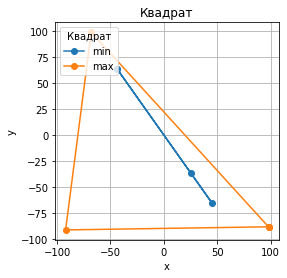

In [22]:
# Построение графика
plt.figure(figsize=(4,4))
plt.title("Квадрат") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(coords_x_min, coords_y_min, coords_x_max, coords_y_max, marker="o")  # построение графика
plt.legend(['min', 'max'], loc=2, title='Квадрат')